In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from pandas.plotting import radviz
from sklearn.neighbors import KNeighborsClassifier 

scale = StandardScaler()
KNN = KNeighborsClassifier()
%matplotlib inline 

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


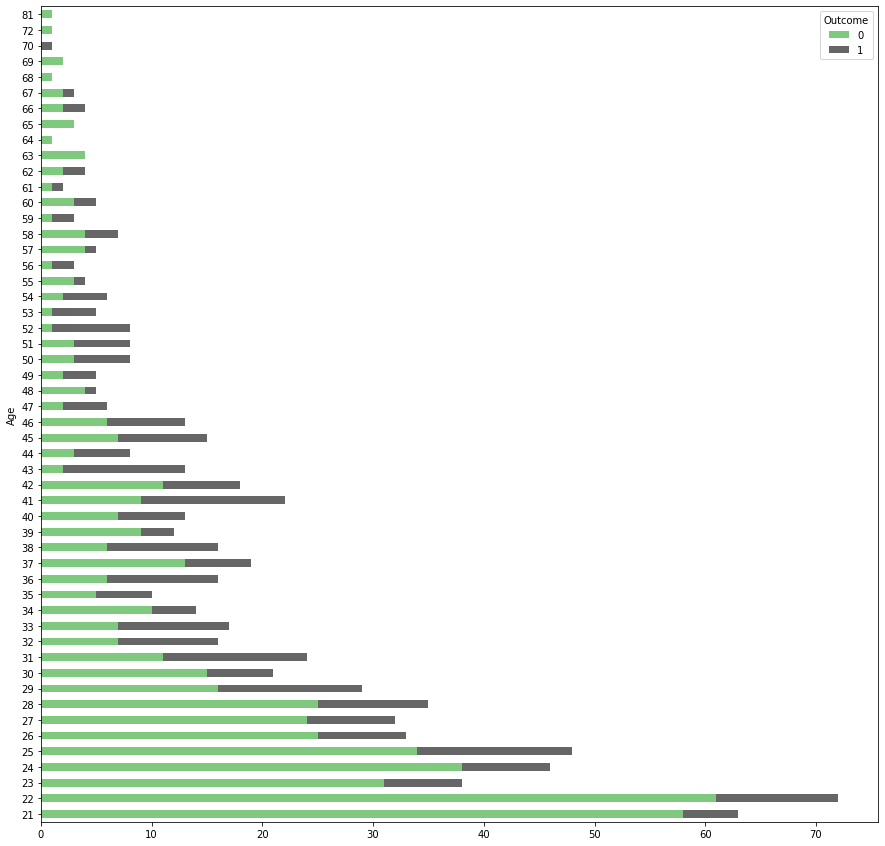

In [5]:
df.groupby('Age')['Outcome'].value_counts().unstack('Outcome').plot(kind='barh', stacked=True,
                                                                    figsize=(15, 15),colormap = "Accent");

It is clearly visible here that younger people have a lower percentage of diabetes than the older segment but it is also visible that a larger number of them have diabetes compared to the older sections . 
*For Example in the 70's people are guranteed of diabetes.*

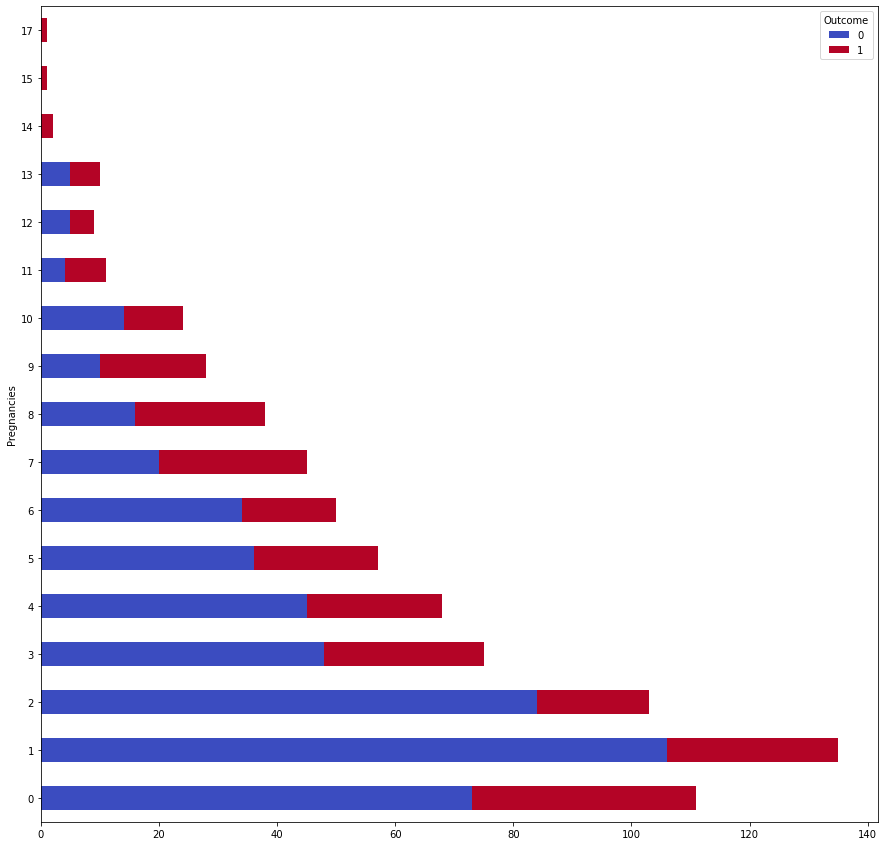

In [6]:
df.groupby('Pregnancies')['Outcome'].value_counts().unstack('Outcome').plot(kind='barh', stacked=True,
                                                                    figsize=(15, 15),colormap = "coolwarm");

We see a similar strnd with pregnancies , the more the more chances of acquiring diabetes

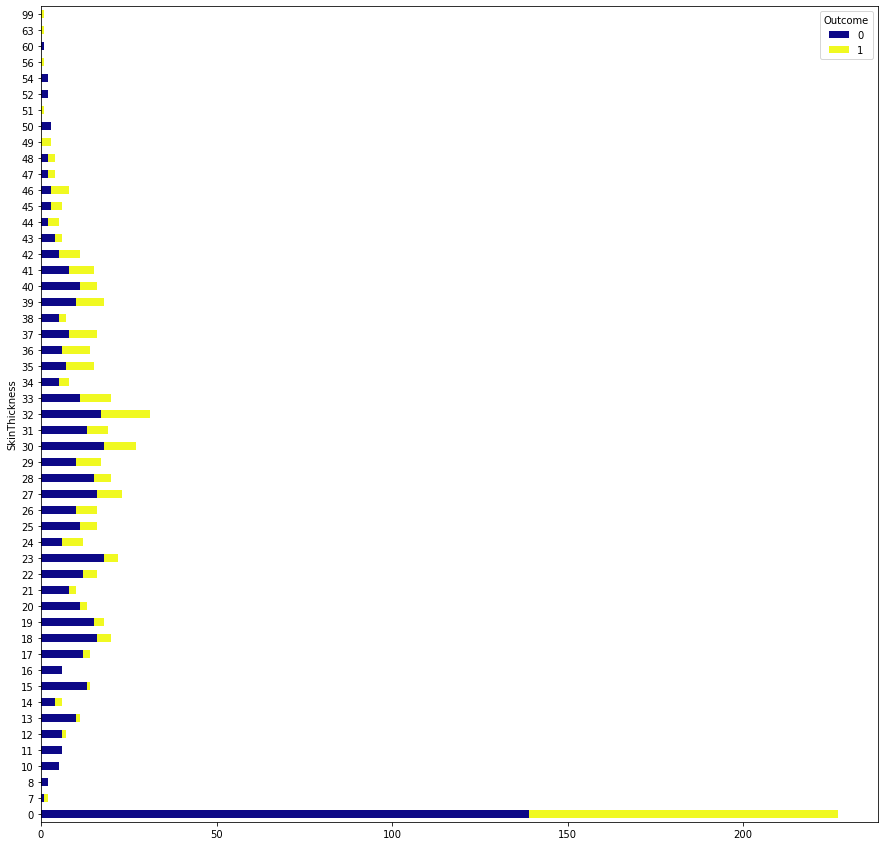

In [7]:
df.groupby('SkinThickness')['Outcome'].value_counts().unstack('Outcome').plot(kind='barh', stacked=True,
                                                                    figsize=(15, 15),colormap = "plasma");

Here we can see that the end points have lesser chances of being a diabetic and in the region closer to the median is where the chances are high

*****Now we can train a neural network based on the information we have to predict if a person is a diabetic .*****

In [8]:
y_val = df['Outcome']
y_values = to_categorical(y_val)
print(y_values)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [9]:
x_val = df[["Pregnancies","Glucose","BloodPressure","Insulin",
               "BMI","Age"]]
x_train, x_test, y_train,y_test = train_test_split(x_val,y_values,random_state = 5,test_size = 0.25)
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 6)
(192, 6)
(576, 2)
(192, 2)


In [11]:
diabetes = Sequential()
diabetes.add(Dense(6,input_dim=6,activation='relu'))
diabetes.add(Dense(4,activation='relu'))
diabetes.add(Dense(2,activation='softmax'))
diabetes.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
diabetes.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [13]:
diabetes.fit(x_train,y_train,epochs=350,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/350
18/18 [==============================] - 12s 29ms/step - loss: 0.7696 - accuracy: 0.3865 - val_loss: 0.7417 - val_accuracy: 0.4167
Epoch 2/350
18/18 [==============================] - 0s 2ms/step - loss: 0.7413 - accuracy: 0.4615 - val_loss: 0.7170 - val_accuracy: 0.5677
Epoch 3/350
18/18 [==============================] - 0s 2ms/step - loss: 0.7247 - accuracy: 0.5293 - val_loss: 0.7005 - val_accuracy: 0.5990
Epoch 4/350
18/18 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.5454 - val_loss: 0.6886 - val_accuracy: 0.6146
Epoch 5/350
18/18 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.5235 - val_loss: 0.6792 - val_accuracy: 0.6510
Epoch 6/350
18/18 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6027 - val_loss: 0.6706 - val_accuracy: 0.6719
Epoch 7/350
18/18 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6146 - val_loss: 0.6643 - val_accuracy: 0.6719
Epoch 8/350

Epoch 59/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7736 - val_loss: 0.4775 - val_accuracy: 0.7708
Epoch 60/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7339 - val_loss: 0.4771 - val_accuracy: 0.7708
Epoch 61/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8149 - val_loss: 0.4768 - val_accuracy: 0.7760
Epoch 62/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7524 - val_loss: 0.4755 - val_accuracy: 0.7760
Epoch 63/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7569 - val_loss: 0.4760 - val_accuracy: 0.7708
Epoch 64/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7822 - val_loss: 0.4756 - val_accuracy: 0.7604
Epoch 65/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7763 - val_loss: 0.4738 - val_accuracy: 0.7656
Epoch 

18/18 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7730 - val_loss: 0.4662 - val_accuracy: 0.7865
Epoch 117/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7725 - val_loss: 0.4666 - val_accuracy: 0.7865
Epoch 118/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7804 - val_loss: 0.4653 - val_accuracy: 0.7865
Epoch 119/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7475 - val_loss: 0.4652 - val_accuracy: 0.7865
Epoch 120/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7638 - val_loss: 0.4657 - val_accuracy: 0.7865
Epoch 121/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7723 - val_loss: 0.4672 - val_accuracy: 0.7865
Epoch 122/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.7906 - val_loss: 0.4672 - val_accuracy: 0.7865
Epoch 123/350

18/18 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7807 - val_loss: 0.4656 - val_accuracy: 0.7865
Epoch 174/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.7936 - val_loss: 0.4662 - val_accuracy: 0.7865
Epoch 175/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8064 - val_loss: 0.4659 - val_accuracy: 0.7865
Epoch 176/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7799 - val_loss: 0.4674 - val_accuracy: 0.7865
Epoch 177/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7711 - val_loss: 0.4681 - val_accuracy: 0.7865
Epoch 178/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7673 - val_loss: 0.4651 - val_accuracy: 0.7865
Epoch 179/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8007 - val_loss: 0.4656 - val_accuracy: 0.7865
Epoch 180/350

18/18 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7998 - val_loss: 0.4655 - val_accuracy: 0.7812
Epoch 231/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.7804 - val_loss: 0.4654 - val_accuracy: 0.7812
Epoch 232/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8055 - val_loss: 0.4655 - val_accuracy: 0.7812
Epoch 233/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.7796 - val_loss: 0.4659 - val_accuracy: 0.7812
Epoch 234/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.7901 - val_loss: 0.4649 - val_accuracy: 0.7865
Epoch 235/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8089 - val_loss: 0.4673 - val_accuracy: 0.7812
Epoch 236/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7833 - val_loss: 0.4657 - val_accuracy: 0.7812
Epoch 237/350

18/18 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7753 - val_loss: 0.4661 - val_accuracy: 0.7865
Epoch 288/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7711 - val_loss: 0.4673 - val_accuracy: 0.7865
Epoch 289/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8105 - val_loss: 0.4675 - val_accuracy: 0.7865
Epoch 290/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.7790 - val_loss: 0.4657 - val_accuracy: 0.7865
Epoch 291/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.7947 - val_loss: 0.4654 - val_accuracy: 0.7865
Epoch 292/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7763 - val_loss: 0.4666 - val_accuracy: 0.7865
Epoch 293/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7846 - val_loss: 0.4678 - val_accuracy: 0.7865
Epoch 294/350

18/18 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8243 - val_loss: 0.4653 - val_accuracy: 0.7865
Epoch 345/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7800 - val_loss: 0.4648 - val_accuracy: 0.7917
Epoch 346/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7905 - val_loss: 0.4681 - val_accuracy: 0.7865
Epoch 347/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.7977 - val_loss: 0.4656 - val_accuracy: 0.7865
Epoch 348/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.7932 - val_loss: 0.4653 - val_accuracy: 0.7865
Epoch 349/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7585 - val_loss: 0.4656 - val_accuracy: 0.7865
Epoch 350/350
18/18 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7784 - val_loss: 0.4669 - val_accuracy: 0.7865


In [14]:
df.tail()  # Note row 766

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [15]:
y = diabetes.predict([[1,126,60,0,30.1,47]])

In [16]:
p = []
for ii in range(0,y.shape[0]):
    p.append(np.argmax(y[ii])) 
print(p)

[1]


***Now we shall try to predict the pedigree function of a person which basically tells us the ancestoral history of being diabetic and diabetes has close connections with family***

In [17]:
y_val = df['DiabetesPedigreeFunction']*1000 #Point to note
y_val = y_val.apply(np.ceil) 

**Here pedigree values are in the order of e-3 and hence i have mutiplied by thousand and rounded them off so as to make it easier for the model to work with data and i have undone this step in the end to get the actual value**

In [18]:
x_val = df[["Pregnancies","Glucose","BloodPressure","Insulin",
            "BMI","Age","Outcome"]]
x_train, x_test, y_train,y_test = train_test_split(x_val,y_val,random_state = 5,test_size = 0.25)
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 7)
(192, 7)
(576,)
(192,)


In [20]:
KNN = KNN.fit(x_train,y_train)

In [21]:
d = {"Pregnancies":[10],"Glucose":[101],"BloodPressure":[76],"Insulin":[180],
     "BMI":[32.9],"Age":[63],"Outcome":[0]}
testdf = pd.DataFrame(data = d)

In [22]:
KNN.predict(testdf)/1000

array([0.158])

Here we can see that the true value is 0.171 but here there is a good approximation and only differs to the true value by -2f decimal places

In [24]:
def diab_inp():
    a = float(input("Enter number of Pregnancies : "))
    b = float(input("Enter Glucose level in blood : "))
    c = float(input("Enter Blood Pressure : "))
    d = float(input("Enter insulin level in blood : "))
    e = float(input("Enter BMI : "))
    g = float(input("Enter Age : "))
    return a,b,c,d,e,g

def predict_from_array(model,*args):
    
    z = [[i for i in args]]
    o = model.predict(np.array(z))
    return np.argmax(o)

In [45]:
a,b,c,d,e,f = diab_inp()
while True:
    ch = input("Enter required action : ").upper().strip()
    print()
    if ch == "PREDICT DIABETES":
        is_diabetic = predict_from_array(diabetes,a,b,c,d,e,f)
        print(f"You are predicted {(is_diabetic)} for Diabetes with 79% accuracy")
        print()
    elif ch == "PREDICT DIABETES PEDIGREE FUNCTION":
        is_diabetic = predict_from_array(diabetes,a,b,c,d,e,f)
        print(f"You are predicted {(is_diabetic)} for Diabetes with 79% accuracy")
        print()
        d = {"Pregnancies":[a],"Glucose":[b],"BloodPressure":[c],"Insulin":[d],
             "BMI":[e],"Age":[f],"Outcome":[(is_diabetic)]}
        print(d)
        testdf = pd.DataFrame(data = d)
        p = KNN.predict(testdf)/1000
        print(f"Your diabetes pedigree function is approximately : {p}")
        print()
    elif ch == "QUIT":
        print("Thank you for using my program !!")
        print()
        break
    else:
        print("Invalid command")
        print()

Enter number of Pregnancies : 1
Enter Glucose level in blood : 126
Enter Blood Pressure : 76
Enter insulin level in blood : 0
Enter BMI : 30.1
Enter Age : 47
Enter required action : predict diabetes 

You are predicted 1 for Diabetes with 79% accuracy

Enter required action : quit

Thank you for using my program !!



In [46]:
df.tail(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0
